## Simple Regression Techniques in Python
[Linear Regression Model Techniques with Python, NumPy, pandas and Seaborn](https://youtu.be/EMIyRmrPWJQ)

In [30]:
import datetime as dt
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yfin

# copyprogramming.com/howto/remotedataerror-no-data-fetched-using-yahoodailyreader
yfin.pdr_override()

# Apply the seaborn theme to plots
sb.set()

### Get Data for SPY and GOOG

In [9]:
stocks = "GOOG SPY".split()

# 1 yr ago
start = dt.date.today() - dt.timedelta(365)

In [12]:
# hist = ticker.history(period="1mo")
data = pdr.get_data_yahoo(stocks, start)
data.head()

[*********************100%%**********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 GOOG         SPY       GOOG         SPY       GOOG   
Date                                                                  
2022-12-07  95.150002  387.066711  95.150002  393.160004  97.309998   
2022-12-08  93.949997  390.098969  93.949997  396.239990  95.870003   
2022-12-09  93.070000  387.184845  93.070000  393.279999  94.489998   
2022-12-12  93.559998  392.766968  93.559998  398.950012  93.875000   
2022-12-13  95.849998  395.740173  95.849998  401.970001  99.800003   

                              Low                   Open              \
                   SPY       GOOG         SPY       GOOG         SPY   
Date                                                                   
2022-12-07  395.640015  95.025002  391.970001  96.769997  392.940002   
2022-12-08  397.359985  93.800003  393.269989  95.690002  395.140015   
2022-12-09  397.619995  93.019997  393.149994  93.900002  394.940002   
2022-12-12  398.950012  91.900002  393.410004  93.089996  394.109985   
2022-12-13  410.489990  95.379997  399.070007  98.070000  410.220001   

              Volume             
                GOOG        SPY  
Date                             
2022-12-07  26647900   65927900  
2022-12-08  25593200   60737900  
2022-12-09  21885300   81447700  
2022-12-12  27380900   75405800  
2022-12-13  34788500  123782500

In [15]:
data = data["Close"]
data.head()

,GOOG,SPY
Date,,
2022-12-07,95.150002,393.160004
2022-12-08,93.949997,396.239990
2022-12-09,93.070000,393.279999
2022-12-12,93.559998,398.950012
2022-12-13,95.849998,401.970001


In [19]:
returns = (np.log(data).diff()).dropna()
returns.head()

,GOOG,SPY
Date,,
2022-12-08,-0.012692,0.007803
2022-12-09,-0.009411,-0.007498
2022-12-12,0.005251,0.014314
2022-12-13,0.024182,0.007541
2022-12-14,-0.005650,-0.006414


In [21]:
# Get the correlations
returns.corr()

,GOOG,SPY
GOOG,1.000000,0.628552
SPY,0.628552,1.000000


In [28]:
# Get a random unsorted sample
sample = returns.sample(60)
sample.corr()

,GOOG,SPY
GOOG,1.000000,0.682822
SPY,0.682822,1.000000


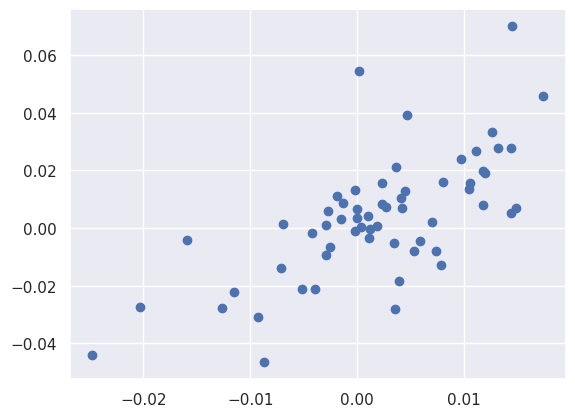

In [32]:
plt.scatter(x=sample['SPY'], y=sample['GOOG'])

In [43]:
reg = np.polyfit(sample['SPY'], sample['GOOG'], deg = 1)
display(reg)
print(f"Intercept at {reg[1]:.5f}")
print(f"Gradient (beta) is {reg[0]:.2f}")
print(f"For every 1% SPY changes, GOOG changes by {reg[0]:.2f}%")

array([1.69531027e+00, 5.33713346e-04])

Intercept at 0.00053
Gradient (beta) is 1.70
For every 1% SPY changes, GOOG changes by 1.70%


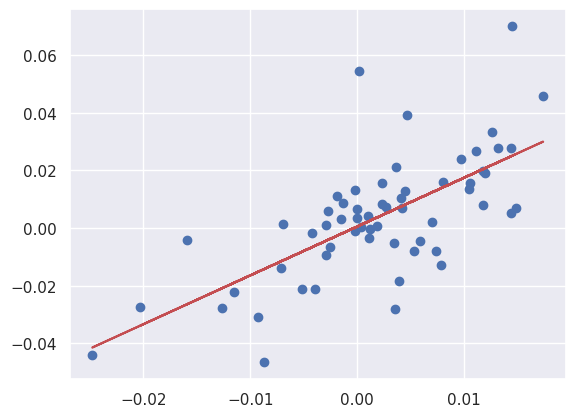

In [46]:
independent_variable = sample['SPY']
trend = np.polyval(reg, independent_variable)
plt.scatter(sample['SPY'], sample['GOOG'])
plt.plot(sample["SPY"], trend, 'r');

### Regression as a Technical Indicator

In [50]:
data = pd.DataFrame(pdr.get_data_yahoo('SPY', start)['Close'])
time = np.arange(1, len(data) + 1)
data['time'] = time
data = data[['time', 'Close']]
data = round(data,2)
data.tail()

[*********************100%%**********************]  1 of 1 completed


,time,Close
Date,,
2023-12-01,248,459.10
2023-12-04,249,456.69
2023-12-05,250,456.60
2023-12-06,251,454.76
2023-12-07,252,458.13


In [54]:
dependent = data['time']
independent = data["Close"]
reg = np.polyfit(dependent, independent, deg = 1)

display(reg)
print(f"Intercept at {reg[1]:.5f}")
print(f"Gradient is {reg[0]:.2f}")
print(f"Every day SPY rises by {reg[0]:.2f}%")

array([2.53739246e-01, 3.89998176e+02])

Intercept at 389.99818
Gradient is 0.25
Every day SPY rises by 0.25%


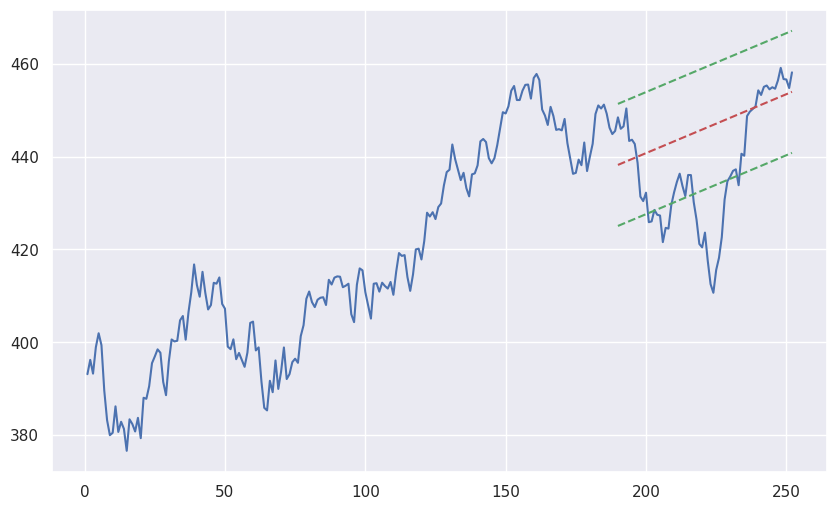

In [57]:
last_3_months = data['time'][-63:]
trend = np.polyval(reg, last_3_months)
std = data['Close'][-63:].std()
plt.figure(figsize=(10,6))
plt.plot(data['time'], data['Close'], label ="S&P500")
plt.plot(data['time'][-63:], trend, 'r--')
plt.plot(data['time'][-63:], trend - std, 'g--')
plt.plot(data['time'][-63:], trend + std, 'g--');

In [64]:
# Predict the value in 50 days
predict = np.poly1d(reg)

plus_50_days = data.shape[0] + 50

print(f"On day {plus_50_days} SPY price is predicted to be {predict(plus_50_days):.2f}")

On day 302 SPY price is predicted to be 466.63


### Simple Scatter Plot with Trend Line

In [67]:
sb.regplot(x='time', y='Close', ci=None, fit_reg=True, data=data[-63:])

KeyError: 'SPY Close'